In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

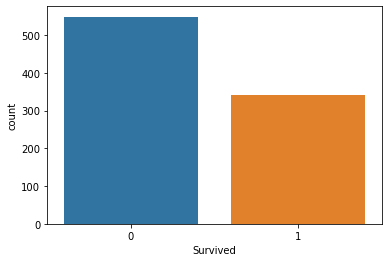

In [6]:
sns.countplot(x = 'Survived', data = train_data)

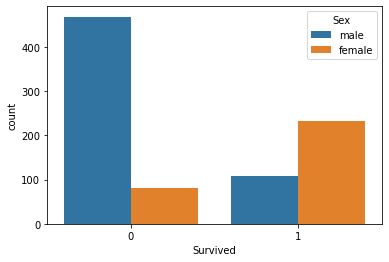

In [7]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)

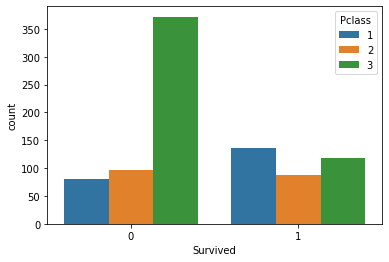

In [8]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

[]

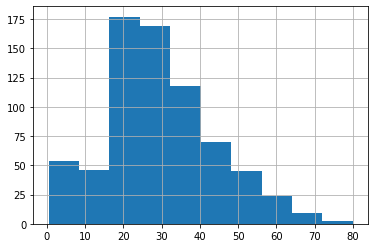

In [9]:
train_data['Age'].hist().plot()

[]

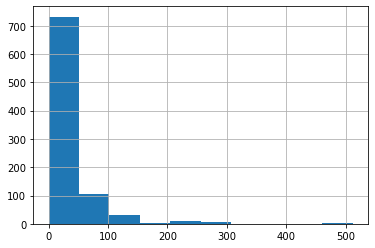

In [10]:
train_data['Fare'].hist().plot(bins=20)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


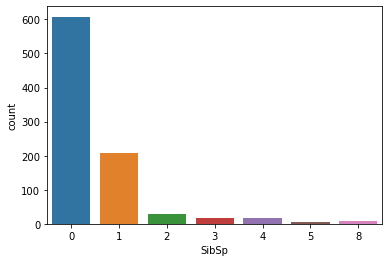

In [12]:
sns.countplot(x = 'SibSp', data = train_data)

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [15]:
print(train_data['Age'].mean())
print(test_data['Age'].mean())

29.69911764705882
30.272590361445783


In [16]:
train_data['Age'].fillna(29.7, inplace=True)
test_data['Age'].fillna(30, inplace=True)
test_data['Fare'].fillna(35.6, inplace=True)

In [17]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [18]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)
sex_test = pd.get_dummies(test_data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
Pclass = pd.get_dummies(train_data['Pclass'], drop_first = True)
Pclass_test = pd.get_dummies(test_data['Pclass'], drop_first = True)
Pclass.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [22]:
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)
embarked_test = pd.get_dummies(test_data['Embarked'], drop_first = True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
train_data = pd.concat([train_data, sex, embarked, Pclass], axis=1)
test_data = pd.concat([test_data, sex_test, embarked_test, Pclass_test], axis=1)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [24]:
train_data.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace=True)
test_data.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis = 1, inplace=True)
train_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [25]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
predictions = log_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(mae)

0.2537313432835821


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [31]:
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

0.27184328358208953


In [32]:
test_data.describe()
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,3,34.5,0,0,7.8292,1,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,1
2,894,2,62.0,0,0,9.6875,1,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,1


In [33]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print(mean_absolute_error(y_test, xgb_preds)) 

0.27238805970149255


In [34]:
test_pred = xgb_model.predict(test_data)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_pred})
output.to_csv('submission.csv', index=False)

In [35]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
2              0
3              0
dtype: int64

In [36]:
test_data['Fare'].mean()

35.62712344497604

In [37]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
